In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

pd.set_option('display.float_format' , lambda x : '{:2f}'.format(x))
np.set_printoptions(suppress = True)

In [2]:
df_customers = pd.read_csv("data/customers.csv")
df_loans = pd.read_csv("data/loans.csv")
df_bureau = pd.read_csv("data/bureau_data.csv")

In [3]:
df_customers.shape , df_loans.shape , df_bureau.shape

((50000, 12), (50000, 15), (50000, 8))

In [4]:
df_customers.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,Delhi,110001
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,Tamil Nadu,600001
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,West Bengal,700001
3,C00004,55,F,Single,Self-Employed,3547000,1,Owned,15,Bangalore,Karnataka,560001
4,C00005,37,M,Married,Salaried,3432000,3,Owned,28,Pune,Maharashtra,411001


In [5]:
df_loans.head()

,loan_id,cust_id,loan_purpose,loan_type,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,L00001,C00001,Auto,Secured,3004000,2467000,49340.000000,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,L00002,C00002,Home,Secured,4161000,3883000,77660.000000,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,L00003,C00003,Personal,Unsecured,2401000,2170000,43400.000000,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False
3,L00004,C00004,Personal,Unsecured,2345000,1747000,34940.000000,314460,1397600,6,1257839,1031094,2019-07-24,2019-08-09,False
4,L00005,C00005,Auto,Secured,4647000,4520000,90400.000000,813600,3616000,28,1772334,1032458,2019-07-24,2019-08-02,False


In [6]:
df_bureau.head()

,cust_id,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,1,1,42,0,0,3,7
1,C00002,3,1,96,12,60,5,4
2,C00003,2,1,82,24,147,6,58
3,C00004,3,0,115,15,87,5,26
4,C00005,4,2,120,0,0,5,10


<h3 align='center' , style = "color:blue" >Data Cleaning</h3>

In [7]:
df = pd.merge(df_customers , df_loans , on="cust_id")
df.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2467000,49340.000000,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,3883000,77660.000000,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,2170000,43400.000000,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False
3,C00004,55,F,Single,Self-Employed,3547000,1,Owned,15,Bangalore,...,1747000,34940.000000,314460,1397600,6,1257839,1031094,2019-07-24,2019-08-09,False
4,C00005,37,M,Married,Salaried,3432000,3,Owned,28,Pune,...,4520000,90400.000000,813600,3616000,28,1772334,1032458,2019-07-24,2019-08-02,False


In [8]:
df = pd.merge(df , df_bureau , on ='cust_id')
df.shape

(50000, 33)

In [9]:
df[['sanction_amount']]

,sanction_amount
0,3004000
1,4161000
2,2401000
3,2345000
4,4647000
...,...
49995,610000
49996,4211000
49997,4097000
49998,1871000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cust_id                      50000 non-null  object 
 1   age                          50000 non-null  int64  
 2   gender                       50000 non-null  object 
 3   marital_status               50000 non-null  object 
 4   employment_status            50000 non-null  object 
 5   income                       50000 non-null  int64  
 6   number_of_dependants         50000 non-null  int64  
 7   residence_type               49938 non-null  object 
 8   years_at_current_address     50000 non-null  int64  
 9   city                         50000 non-null  object 
 10  state                        50000 non-null  object 
 11  zipcode                      50000 non-null  int64  
 12  loan_id                      50000 non-null  object 
 13  loan_purpose    

In [11]:
df['default'] = df['default'].astype(int)
df['default'].value_counts()

# default column is the target feature , and there have class inbalanced

default
0    45703
1     4297
Name: count, dtype: int64

In [12]:
X = df.drop("default" , axis = "columns")
y = df["default"]

X_train , X_test , y_train ,y_test = train_test_split(X , y , test_size = 0.25 , random_state = 42)

df_train = pd.concat([X_train , y_train] , axis = 1)
df_test = pd.concat([X_test , y_test] , axis = 1)

df_train.shape , df_test.shape


((37500, 33), (12500, 33))

In [13]:
df_train.isna().sum()

cust_id                         0
age                             0
gender                          0
marital_status                  0
employment_status               0
income                          0
number_of_dependants            0
residence_type                 48
years_at_current_address        0
city                            0
state                           0
zipcode                         0
loan_id                         0
loan_purpose                    0
loan_type                       0
sanction_amount                 0
loan_amount                     0
processing_fee                  0
gst                             0
net_disbursement                0
loan_tenure_months              0
principal_outstanding           0
bank_balance_at_application     0
disbursal_date                  0
installment_start_dt            0
number_of_open_accounts         0
number_of_closed_accounts       0
total_loan_months               0
delinquent_months               0
total_dpd     

In [14]:
df_train.residence_type.unique()

array(['Owned', 'Mortgage', 'Rented', nan], dtype=object)

In [15]:
mode_residence = df_train.residence_type.mode()[0]
mode_residence

'Owned'

In [16]:
df_train.residence_type.fillna(mode_residence , inplace = True)
df_train.residence_type.unique()

array(['Owned', 'Mortgage', 'Rented'], dtype=object)

In [17]:
df_test.residence_type.fillna(mode_residence , inplace = True)
df_test.residence_type.unique()

array(['Owned', 'Rented', 'Mortgage'], dtype=object)

In [18]:
df_train.duplicated().sum()

0

In [19]:
numeric_columns = df_train.select_dtypes(['int64' , 'float64']).columns
categorical_columns = df_train.select_dtypes(include=['object', 'category']).columns


categorical_columns, numeric_columns

(Index(['cust_id', 'gender', 'marital_status', 'employment_status',
        'residence_type', 'city', 'state', 'loan_id', 'loan_purpose',
        'loan_type', 'disbursal_date', 'installment_start_dt'],
       dtype='object'),
 Index(['age', 'income', 'number_of_dependants', 'years_at_current_address',
        'zipcode', 'sanction_amount', 'loan_amount', 'processing_fee', 'gst',
        'net_disbursement', 'loan_tenure_months', 'principal_outstanding',
        'bank_balance_at_application', 'number_of_open_accounts',
        'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
        'total_dpd', 'enquiry_count', 'credit_utilization_ratio'],
       dtype='object'))

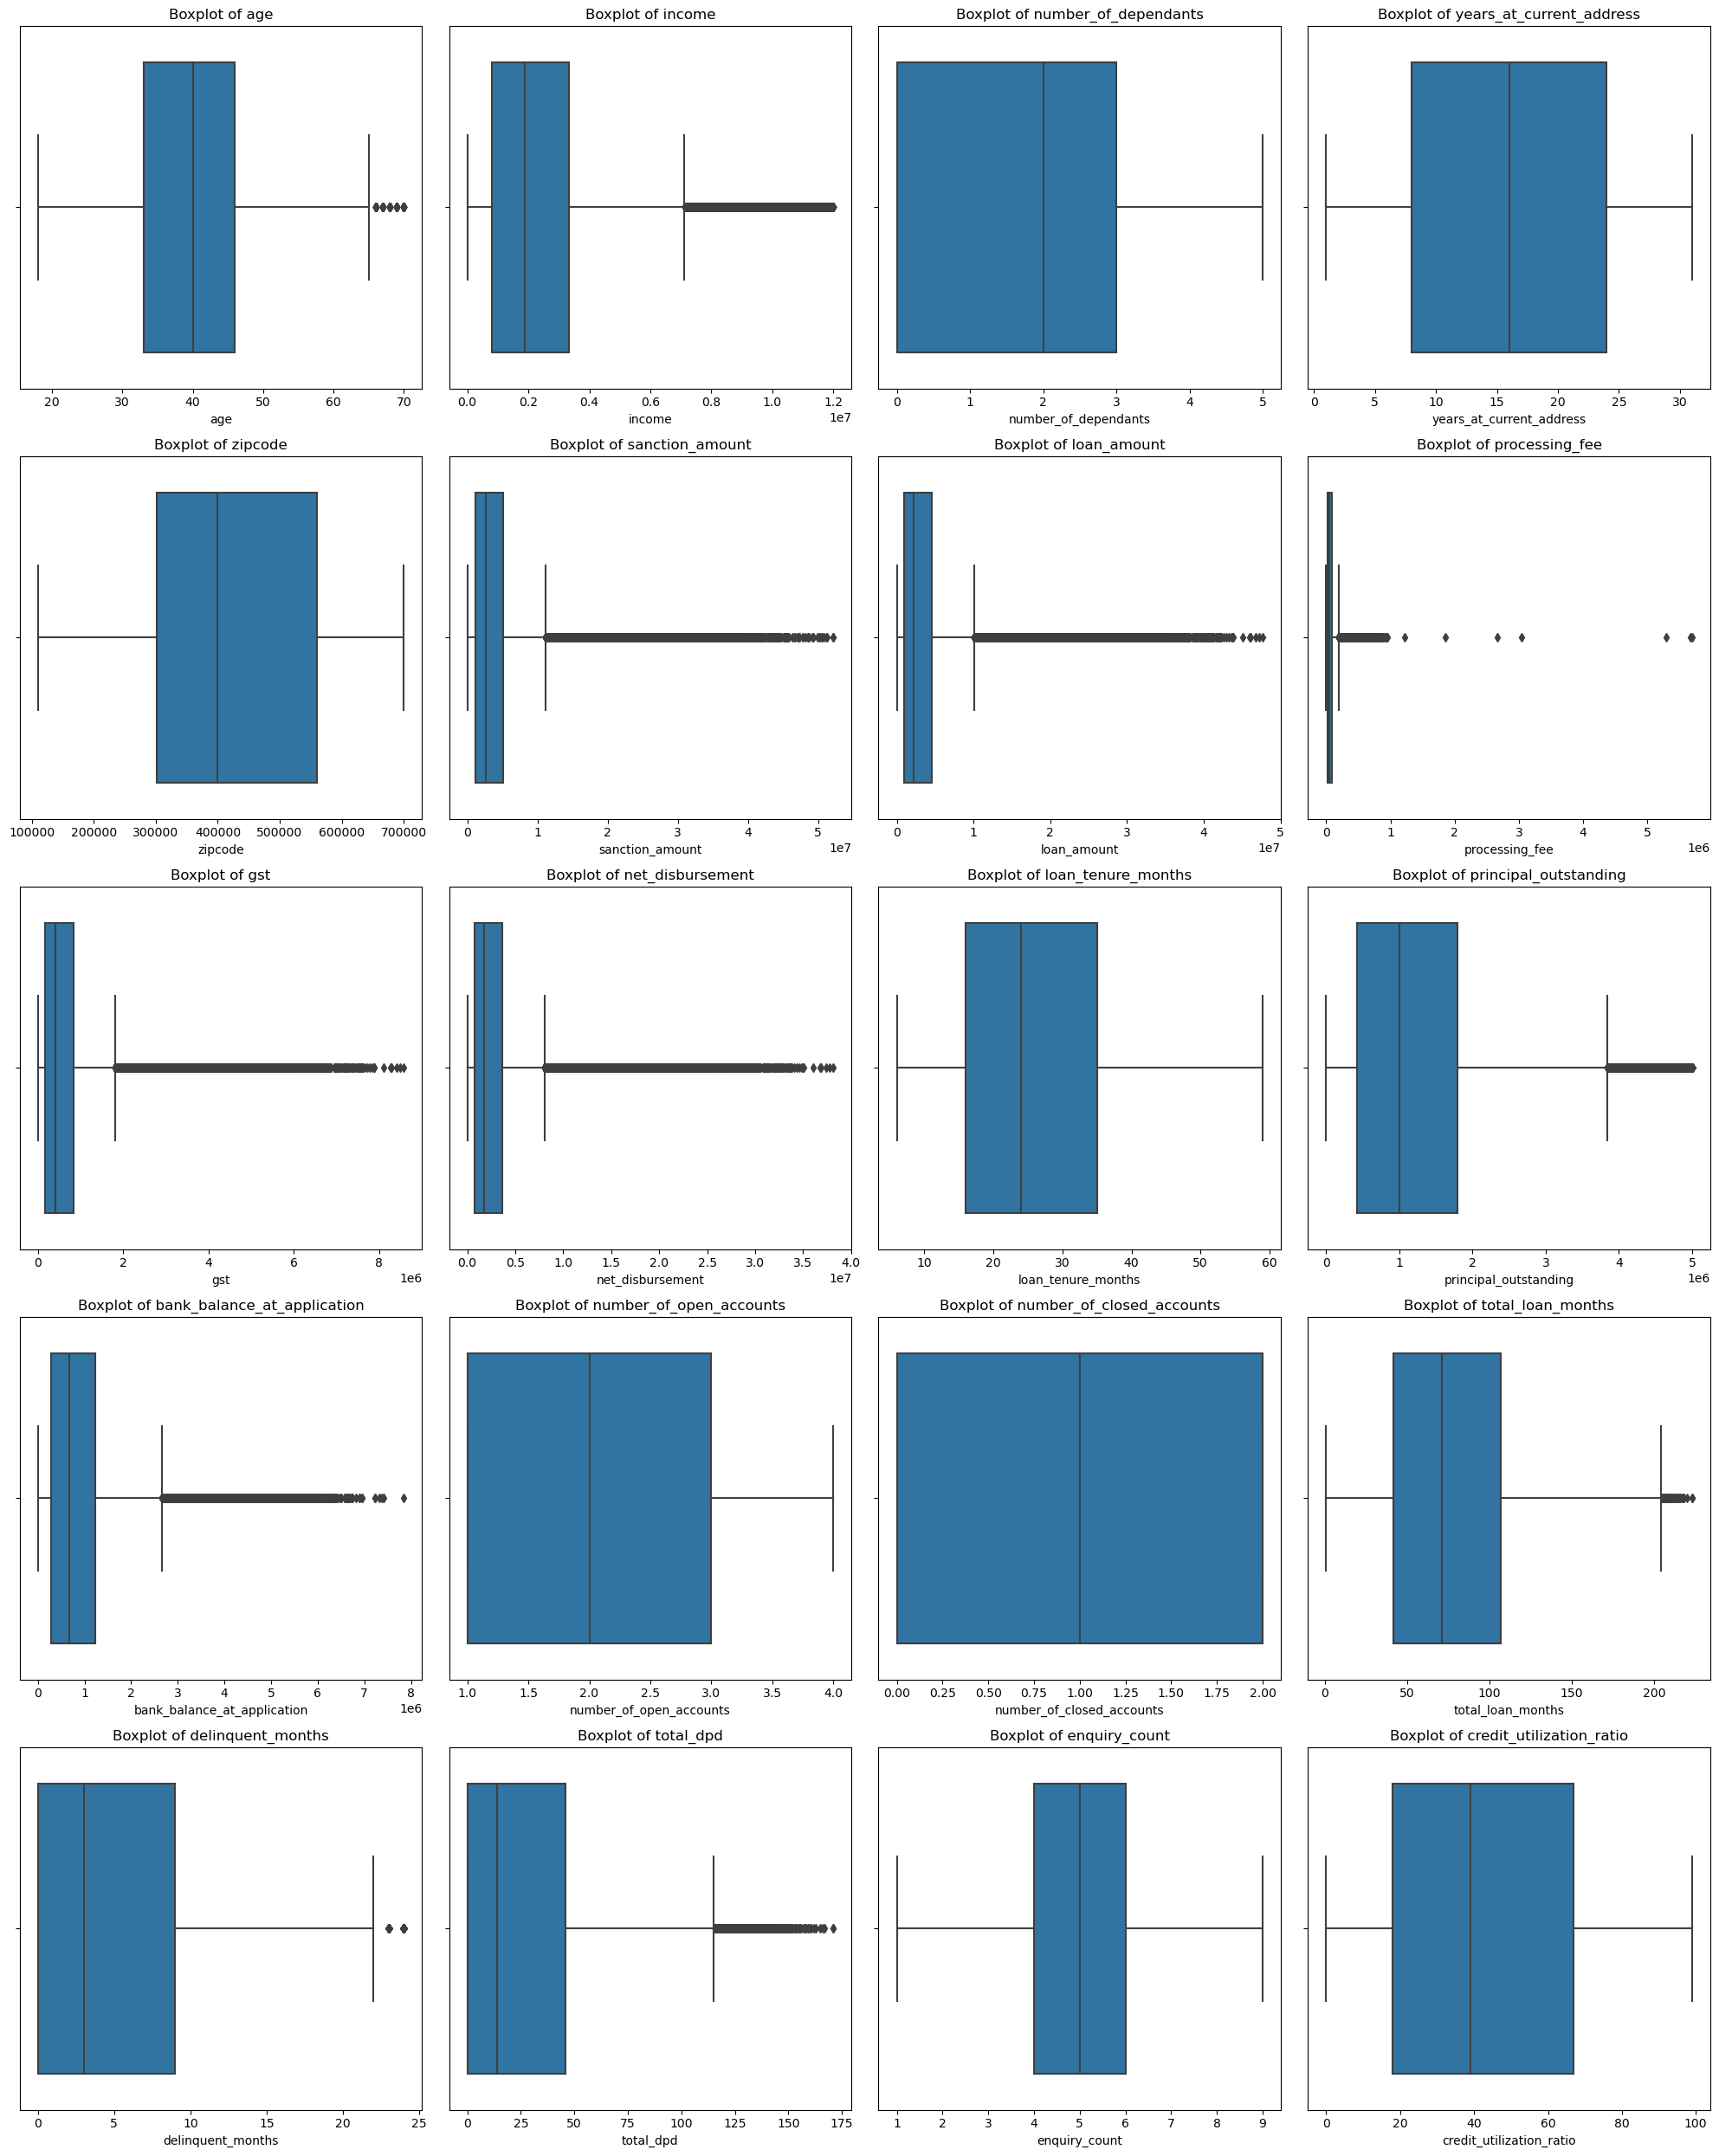

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(5, 4, figsize=(20, 25))  # Create subplots
axes = axes.flatten()  # Flatten the axes array for easy indexing

for i, col in enumerate(numeric_columns):
    sns.boxplot(x=df_train[col], ax=axes[i])  # Create boxplot
    axes[i].set_title(f'Boxplot of {col}', fontsize=12)  # Set title

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


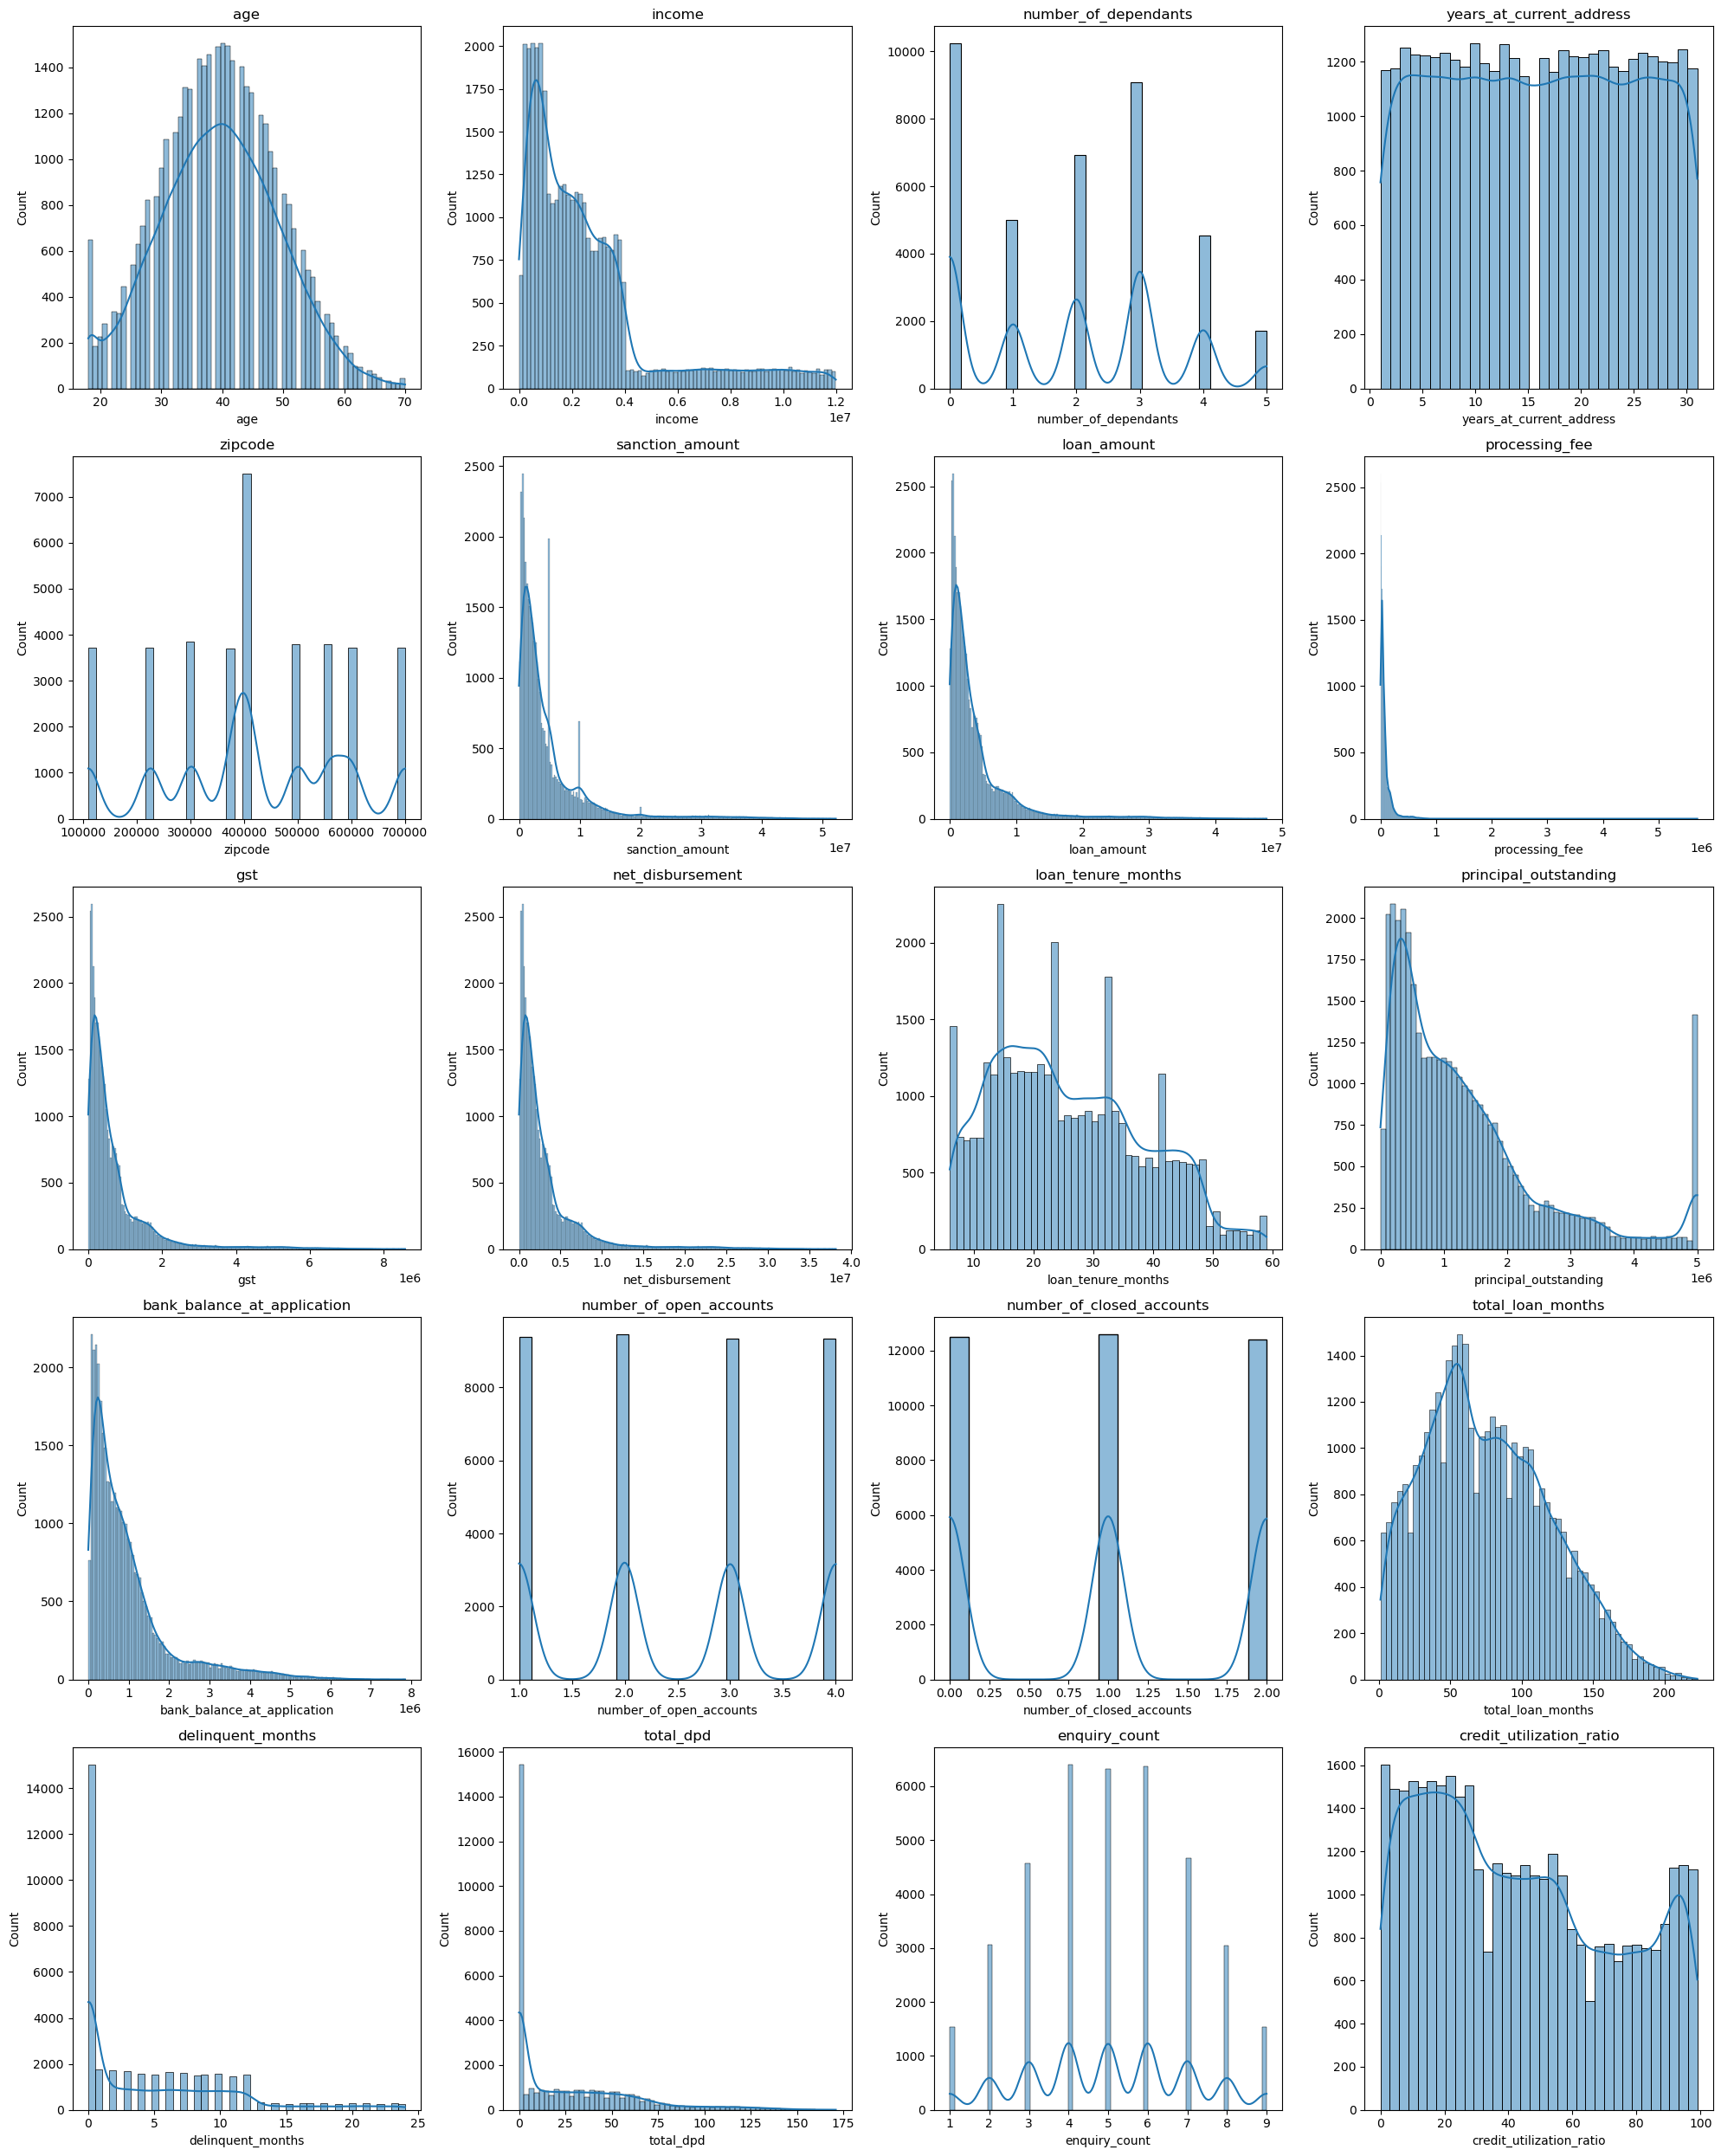

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(5, 4, figsize=(20, 25))  # Create subplots
axes = axes.flatten()  # Flatten the axes array for easy indexing

for i, col in enumerate(numeric_columns):
    sns.histplot(x=df_train[col], ax=axes[i] , kde = True)  # Create boxplot
    axes[i].set_title(f'{col}', fontsize=12)  # Set title

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


#### Processing Fee Column_____________________

In [22]:
df_train.processing_fee.describe()

count     37500.000000
mean      80724.108820
std      120830.650009
min           0.000000
25%       19180.000000
50%       44700.000000
75%       92000.000000
max     5698029.900775
Name: processing_fee, dtype: float64

In [23]:
df_train[df_train.processing_fee / df_train.loan_amount > 0.03][["loan_amount" , "processing_fee"]]


,loan_amount,processing_fee
23981,2234000,2669791.023135
9898,3626000,5293543.524214
47089,1738000,1858964.767890
33705,3812000,5678020.859010
12294,4639000,5698029.900775
28174,966000,1214492.673088
29305,2616000,3036378.005267


In [24]:
df_train_1 = df_train[df_train.processing_fee / df_train.loan_amount < 0.03].copy()
df_train_1[df_train_1.processing_fee / df_train_1.loan_amount > 0.03][["loan_amount" , "processing_fee"]]


,loan_amount,processing_fee


In [25]:
df_test_1 = df_test[df_test.processing_fee / df_test.loan_amount < 0.03].copy()
df_test_1[df_test_1.processing_fee / df_test_1.loan_amount > 0.03][["loan_amount" , "processing_fee"]]


,loan_amount,processing_fee


In [26]:
categorical_columns

Index(['cust_id', 'gender', 'marital_status', 'employment_status',
       'residence_type', 'city', 'state', 'loan_id', 'loan_purpose',
       'loan_type', 'disbursal_date', 'installment_start_dt'],
      dtype='object')

In [27]:
for col in categorical_columns:
    print(col , "-->" , df_train_1[col].unique())

cust_id --> ['C27435' 'C13401' 'C00884' ... 'C38159' 'C00861' 'C15796']
gender --> ['F' 'M']
marital_status --> ['Single' 'Married']
employment_status --> ['Salaried' 'Self-Employed']
residence_type --> ['Owned' 'Mortgage' 'Rented']
city --> ['Ahmedabad' 'Delhi' 'Lucknow' 'Bangalore' 'Jaipur' 'Hyderabad' 'Kolkata'
 'Pune' 'Chennai' 'Mumbai']
state --> ['Gujarat' 'Delhi' 'Uttar Pradesh' 'Karnataka' 'Rajasthan' 'Telangana'
 'West Bengal' 'Maharashtra' 'Tamil Nadu']
loan_id --> ['L27435' 'L13401' 'L00884' ... 'L38159' 'L00861' 'L15796']
loan_purpose --> ['Home' 'Auto' 'Personal' 'Education' 'Personaal']
loan_type --> ['Secured' 'Unsecured']
disbursal_date --> ['2022-04-21' '2020-11-24' '2019-08-25' ... '2024-04-06' '2021-11-30'
 '2021-11-24']
installment_start_dt --> ['2022-05-21' '2020-12-11' '2019-09-19' ... '2024-08-16' '2019-07-27'
 '2022-12-02']


#### Loan_purpose column___________________

In [28]:
df_train_1["loan_purpose"] = df_train_1["loan_purpose"].replace('Personaal' , 'Personal')
df_test_1["loan_purpose"] = df_test_1["loan_purpose"].replace('Personaal' , 'Personal')


In [29]:
df_train_1["loan_purpose"].unique() , df_test_1["loan_purpose"].unique()

(array(['Home', 'Auto', 'Personal', 'Education'], dtype=object),
 array(['Education', 'Home', 'Auto', 'Personal'], dtype=object))

<h3 align='center' style="color:blue">Exploratory Data Analysis</h3>

In [30]:
numeric_columns

Index(['age', 'income', 'number_of_dependants', 'years_at_current_address',
       'zipcode', 'sanction_amount', 'loan_amount', 'processing_fee', 'gst',
       'net_disbursement', 'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio'],
      dtype='object')

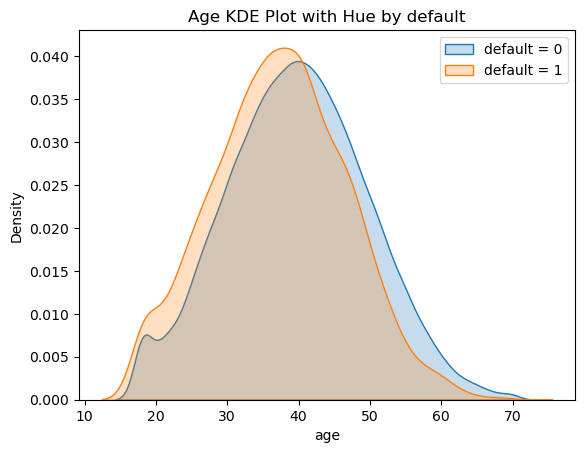

In [31]:
sns.kdeplot(df_train_1[df_train_1.default == 0]['age'] , fill = True , label ="default = 0")
sns.kdeplot(df_train_1[df_train_1.default == 1]['age'] , fill = True , label ="default = 1")
plt.title(f'Age KDE Plot with Hue by default')
plt.legend()
plt.show()




Insights

1.Orange graph is little bit shifted to the left of blue graph which indecates that people with young age are more likely to default 

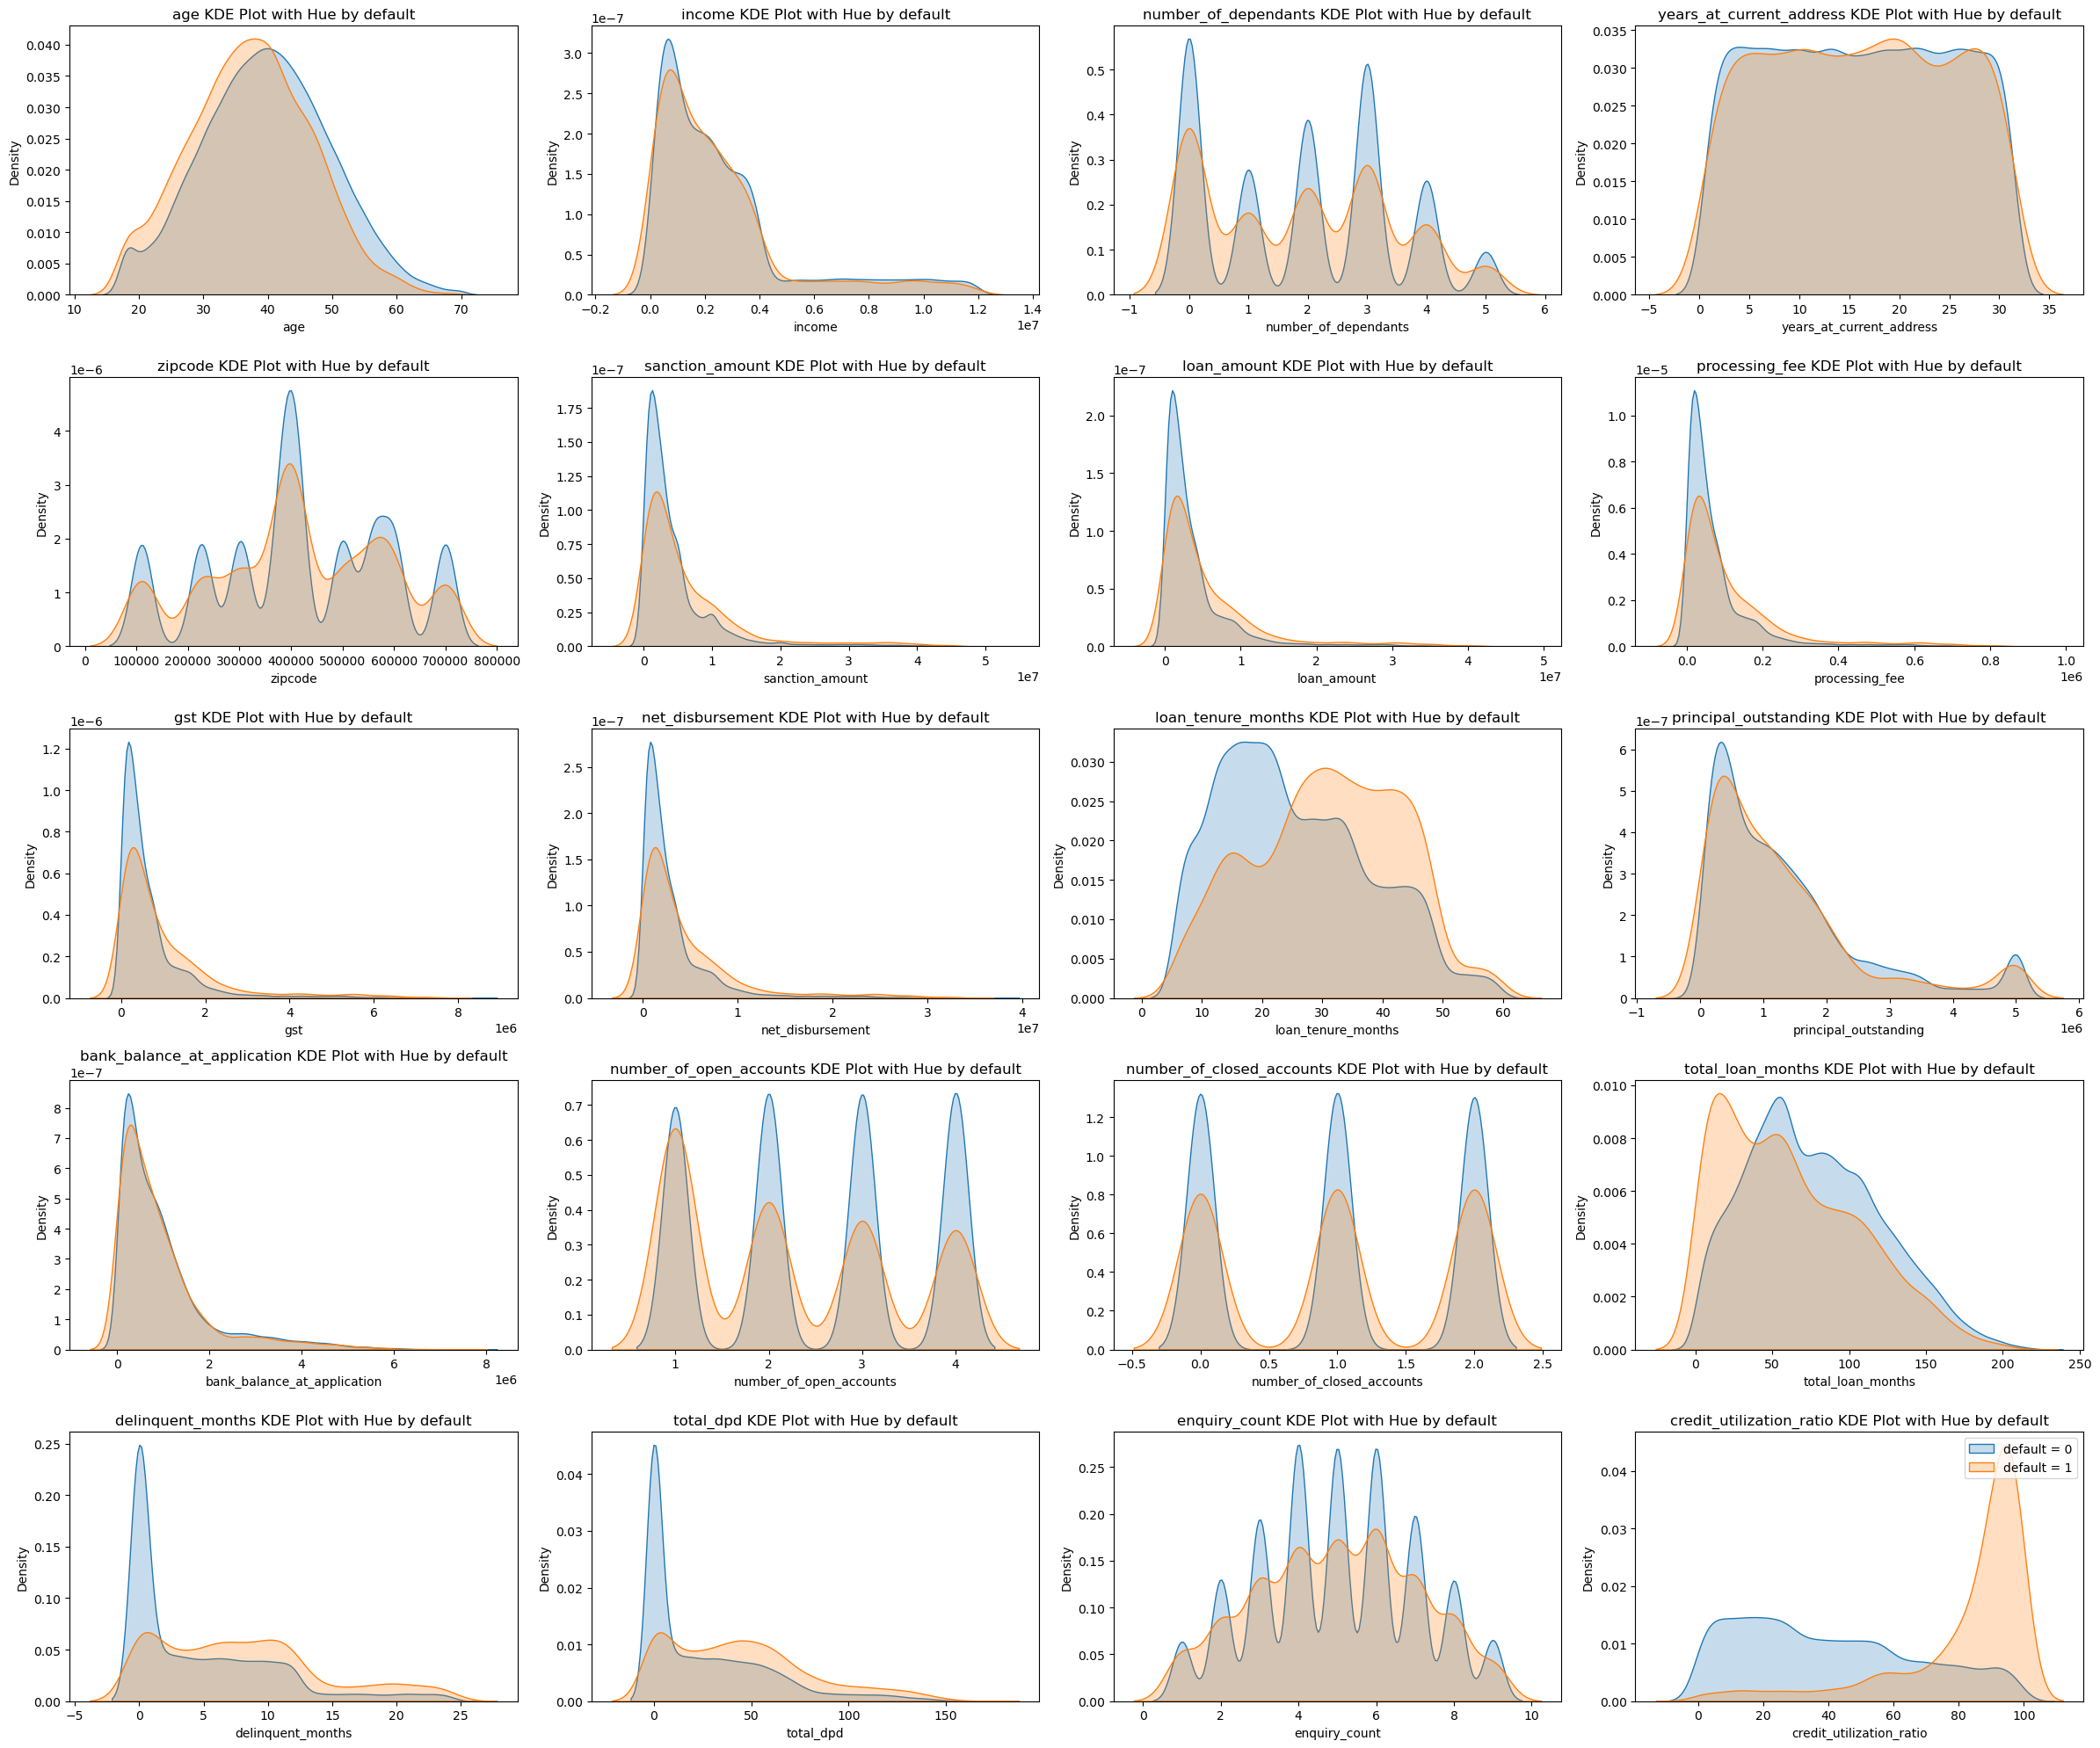

In [32]:
fig , axes = plt.subplots(5 , 4 , figsize =(24 , 20) )
axes = axes.flatten()

for i , col in enumerate(numeric_columns):
    sns.kdeplot(df_train_1[df_train_1.default == 0][col] , fill = True , label ="default = 0" , ax = axes[i])
    sns.kdeplot(df_train_1[df_train_1.default == 1][col] , fill = True , label ="default = 1" , ax= axes[i])
    axes[i].set_title(f'{col} KDE Plot with Hue by default')
plt.legend()
plt.tight_layout()
plt.show()

    

In [33]:
#insights:










### Feature Enginnering

<h4 align='center' style ='color:green'>Suggestions for feature engineering :</h4>
    
   <p>  a. Loan to income ratio is better mectric compared to loan amount and income as individual features </p>
  </p>  b. Delinquent months to loan months ratio is better compared to those individual features</p>
   </p> c .Average DPD per delinquent month is better metric compared to total dpd and delinquent months</p>
    
    
    

In [34]:
df_train_1["loan_to_income"] = df_train_1["loan_amount" ] / df_train_1[ "income"] 
df_train_1[["loan_to_income"]].head()         
           

,loan_to_income
27434,2.896552
13400,1.084080
883,0.664130
7303,1.095588
45124,1.843972


In [35]:
df_test_1["loan_to_income"] = df_test_1["loan_amount" ] / df_test_1[ "income"] 
df_test_1[["loan_to_income"]].head() 
           
           

,loan_to_income
33553,1.397569
9427,3.240367
199,3.014939
12447,1.098901
39489,1.018759


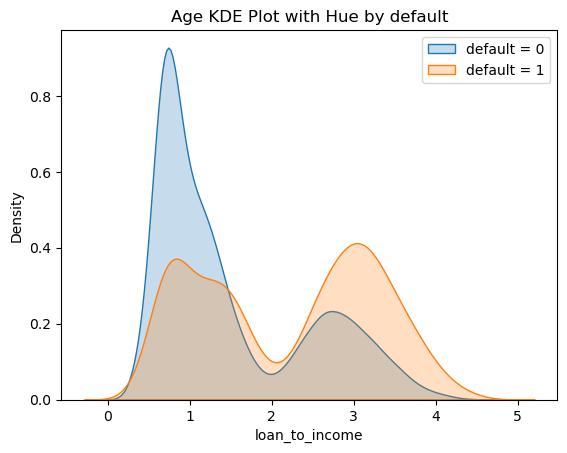

In [36]:
sns.kdeplot(df_train_1[df_train_1.default == 0]['loan_to_income'] , fill = True , label ="default = 0")
sns.kdeplot(df_train_1[df_train_1.default == 1]['loan_to_income'] , fill = True , label ="default = 1")
plt.title(f'Age KDE Plot with Hue by default')
plt.legend()
plt.show()

In [37]:
df_train_1.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default',
       'loan_to_income'],
      dtype='object')

In [38]:
df_train_1[['delinquent_months' , 'total_loan_months']]

,delinquent_months,total_loan_months
27434,6,90
13400,4,119
883,14,83
7303,0,37
45124,6,62
...,...,...
11284,23,129
44732,0,80
38158,0,8
860,5,130


In [39]:
df_train_1["delinquent_ratio"] = df_train_1["delinquent_months"] / df_train_1["total_loan_months"] * 100
df_train_1[['delinquent_months' , 'total_loan_months' , 'delinquent_ratio']].head()

,delinquent_months,total_loan_months,delinquent_ratio
27434,6,90,6.666667
13400,4,119,3.361345
883,14,83,16.867470
7303,0,37,0.000000
45124,6,62,9.677419


In [40]:
df_test_1["delinquent_ratio"] = df_test_1["delinquent_months"] / df_test_1["total_loan_months"] * 100
df_test_1[['delinquent_months' , 'total_loan_months' , 'delinquent_ratio']].head()

,delinquent_months,total_loan_months,delinquent_ratio
33553,3,70,4.285714
9427,0,115,0.000000
199,0,144,0.000000
12447,0,93,0.000000
39489,20,152,13.157895


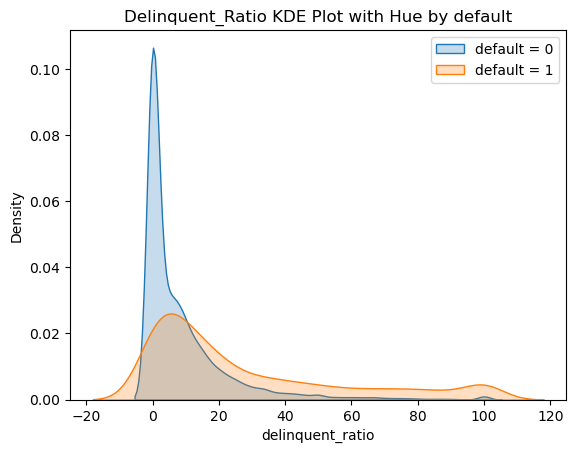

In [41]:
sns.kdeplot(df_train_1[df_train_1.default == 0]['delinquent_ratio'] , fill = True , label ="default = 0")
sns.kdeplot(df_train_1[df_train_1.default == 1]['delinquent_ratio'] , fill = True , label ="default = 1")
plt.title(f'Delinquent_Ratio KDE Plot with Hue by default')
plt.legend()
plt.show()

In [42]:
df_train_1["avg_dpd_per_delinquent_month"] = df_train_1['total_dpd'] / df_train_1['delinquent_months'] 
df_train_1['avg_dpd_per_delinquent_month'].isna().sum()


15013

In [43]:
df_train_1["avg_dpd_per_delinquent_month"] = np.where(
    df_train_1['delinquent_months'] != 0 ,
    df_train_1['total_dpd'] / df_train_1['delinquent_months'] , 
    0
)
df_train_1['avg_dpd_per_delinquent_month'].isna().sum()

0

In [44]:
df_test_1["avg_dpd_per_delinquent_month"] = np.where(
    df_test_1['delinquent_months'] != 0 ,
    df_test_1['total_dpd'] / df_test_1['delinquent_months'] , 
    0
)
df_test_1['avg_dpd_per_delinquent_month'].isna().sum()

0

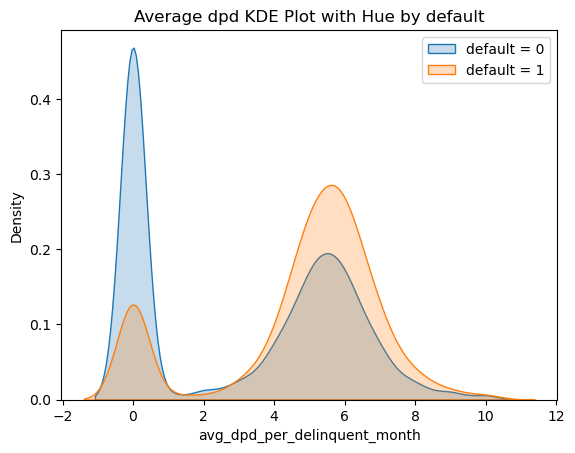

In [45]:
sns.kdeplot(df_train_1[df_train_1.default == 0]['avg_dpd_per_delinquent_month'] , fill = True , label ="default = 0")
sns.kdeplot(df_train_1[df_train_1.default == 1]['avg_dpd_per_delinquent_month'] , fill = True , label ="default = 1")
plt.title(f'Average dpd KDE Plot with Hue by default')
plt.legend()
plt.show()

In [46]:
df_train.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default'],
      dtype='object')

### Feature Selection

In [47]:
df_train_2 = df_train_1.drop(['cust_id' , 'loan_id'] , axis = 1 )
df_test_2 = df_test_1.drop(['cust_id' , 'loan_id'] , axis = 1 )

In [48]:
df_train_3 = df_train_2.drop(['disbursal_date' , 'installment_start_dt' , 'income' ,'total_loan_months' , 'delinquent_months' , 'total_dpd'] , axis = 1)
df_test_3 = df_test_2.drop(['disbursal_date' , 'installment_start_dt' , 'income' ,'total_loan_months' , 'delinquent_months' , 'total_dpd'] , axis = 1)



In [49]:
df_train_3.columns

Index(['age', 'gender', 'marital_status', 'employment_status',
       'number_of_dependants', 'residence_type', 'years_at_current_address',
       'city', 'state', 'zipcode', 'loan_purpose', 'loan_type',
       'sanction_amount', 'loan_amount', 'processing_fee', 'gst',
       'net_disbursement', 'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'default', 'loan_to_income',
       'delinquent_ratio', 'avg_dpd_per_delinquent_month'],
      dtype='object')

In [50]:
df_train_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37487 entries, 27434 to 15795
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           37487 non-null  int64  
 1   gender                        37487 non-null  object 
 2   marital_status                37487 non-null  object 
 3   employment_status             37487 non-null  object 
 4   number_of_dependants          37487 non-null  int64  
 5   residence_type                37487 non-null  object 
 6   years_at_current_address      37487 non-null  int64  
 7   city                          37487 non-null  object 
 8   state                         37487 non-null  object 
 9   zipcode                       37487 non-null  int64  
 10  loan_purpose                  37487 non-null  object 
 11  loan_type                     37487 non-null  object 
 12  sanction_amount               37487 non-null  int64  
 13  lo

In [51]:
df_train_3.select_dtypes(['int64' , 'float64']).columns

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'sanction_amount', 'loan_amount', 'processing_fee', 'gst',
       'net_disbursement', 'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquent_ratio',
       'avg_dpd_per_delinquent_month'],
      dtype='object')

In [52]:
X_train = df_train_3.drop("default" , axis =1)
y_train = df_train_3["default"]


from sklearn.preprocessing import MinMaxScaler

cols_to_scale = df_train_3.select_dtypes(['int64' , 'float64']).columns 

scaler = MinMaxScaler()
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_train.head(3)



,age,gender,marital_status,employment_status,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode,...,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquent_ratio,avg_dpd_per_delinquent_month
27434,0.519231,F,Single,Salaried,0.000000,Owned,0.133333,Ahmedabad,Gujarat,0.457627,...,0.339623,0.175096,0.069846,1.000000,1.000000,0.875000,0.595960,0.609125,0.066667,0.550000
13400,0.211538,M,Single,Salaried,0.000000,Owned,0.800000,Delhi,Delhi,0.000000,...,0.509434,0.195995,0.119061,0.666667,0.500000,0.375000,0.929293,0.184564,0.033613,0.425000
883,0.615385,F,Single,Self-Employed,0.000000,Mortgage,0.933333,Lucknow,Uttar Pradesh,0.196610,...,0.245283,0.271233,0.096133,0.333333,0.500000,0.375000,0.838384,0.086193,0.168675,0.557143


In [53]:
X_train[cols_to_scale].describe()

,age,number_of_dependants,years_at_current_address,zipcode,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquent_ratio,avg_dpd_per_delinquent_month
count,37487.000000,37487.000000,37487.000000,37487.000000,37487.000000,37487.000000,37487.000000,37487.000000,37487.000000,37487.000000,37487.000000,37487.000000,37487.000000,37487.000000,37487.000000,37487.000000,37487.000000,37487.000000,37487.000000
mean,0.414681,0.388476,0.499787,0.523326,0.088989,0.083030,0.083030,0.083030,0.083030,0.375431,0.261931,0.123683,0.498795,0.498386,0.500410,0.437656,0.294842,0.103945,0.329463
std,0.189510,0.307163,0.297939,0.286165,0.120709,0.113437,0.113437,0.113437,0.113437,0.234410,0.244515,0.133507,0.372407,0.407528,0.252997,0.296517,0.227896,0.172685,0.290336
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.288462,0.000000,0.233333,0.325424,0.020440,0.019100,0.019100,0.019100,0.019100,0.188679,0.078179,0.034088,0.000000,0.000000,0.375000,0.181818,0.110901,0.000000,0.000000
50%,0.423077,0.400000,0.500000,0.491525,0.049536,0.045887,0.045887,0.045887,0.045887,0.339623,0.194385,0.082720,0.333333,0.500000,0.500000,0.393939,0.201436,0.037975,0.433333
75%,0.538462,0.600000,0.766667,0.762712,0.097660,0.095512,0.095512,0.095512,0.095512,0.547170,0.353152,0.155525,0.666667,1.000000,0.625000,0.676768,0.505510,0.131148,0.575000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [54]:
X_test = df_test_3.drop("default" , axis =1)
y_test = df_test_3["default"]



X_test[cols_to_scale] = scaler.fit_transform(X_test[cols_to_scale])
X_test.head(3)



,age,gender,marital_status,employment_status,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode,...,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquent_ratio,avg_dpd_per_delinquent_month
33553,0.346154,F,Married,Self-Employed,0.600000,Owned,0.466667,Hyderabad,Telangana,0.661017,...,0.528302,0.303452,0.256828,0.333333,1.000000,0.500000,0.121212,0.255700,0.042857,0.900000
9427,0.288462,F,Single,Salaried,0.000000,Owned,0.466667,Jaipur,Rajasthan,0.325424,...,0.622642,0.265925,0.114677,1.000000,0.000000,1.000000,0.858586,0.685169,0.000000,0.000000
199,0.192308,M,Single,Self-Employed,0.000000,Owned,0.600000,Delhi,Delhi,0.000000,...,0.622642,0.101394,0.045241,1.000000,0.500000,0.375000,0.727273,0.632632,0.000000,0.000000


In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


def calculate_vif(data): 
    vif_df = pd.DataFrame()
    vif_df['Column'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data.values , i ) for i in range(data.shape[1])]
    return vif_df



In [56]:
calculate_vif(X_train[cols_to_scale])

C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Column,VIF
0,age,5.717145
1,number_of_dependants,2.731678
2,years_at_current_address,3.424728
3,zipcode,3.793723
4,sanction_amount,102.154758
5,loan_amount,inf
6,processing_fee,inf
7,gst,inf
8,net_disbursement,inf
9,loan_tenure_months,6.142561


In [57]:
X_test_1 = X_test.drop(["processing_fee" , "gst" ,"net_disbursement" ,"loan_amount" ,"principal_outstanding" ] , axis = 1)


X_train_1 = X_train.drop(["processing_fee" , "gst" ,"net_disbursement" ,"loan_amount" ,"principal_outstanding" ] , axis = 1)
numeric_columns = X_train_1.select_dtypes(['int64' , 'float64']).columns

vif_df = calculate_vif(X_train_1[numeric_columns])
vif_df


,Column,VIF
0,age,5.471892
1,number_of_dependants,2.731138
2,years_at_current_address,3.422168
3,zipcode,3.789272
4,sanction_amount,4.596775
5,loan_tenure_months,5.984444
6,bank_balance_at_application,4.190263
7,number_of_open_accounts,4.321654
8,number_of_closed_accounts,2.355137
9,enquiry_count,6.392102


In [58]:
selected_numeric_features_vif = vif_df.Column.values
selected_numeric_features_vif

array(['age', 'number_of_dependants', 'years_at_current_address',
       'zipcode', 'sanction_amount', 'loan_tenure_months',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquent_ratio',
       'avg_dpd_per_delinquent_month'], dtype=object)

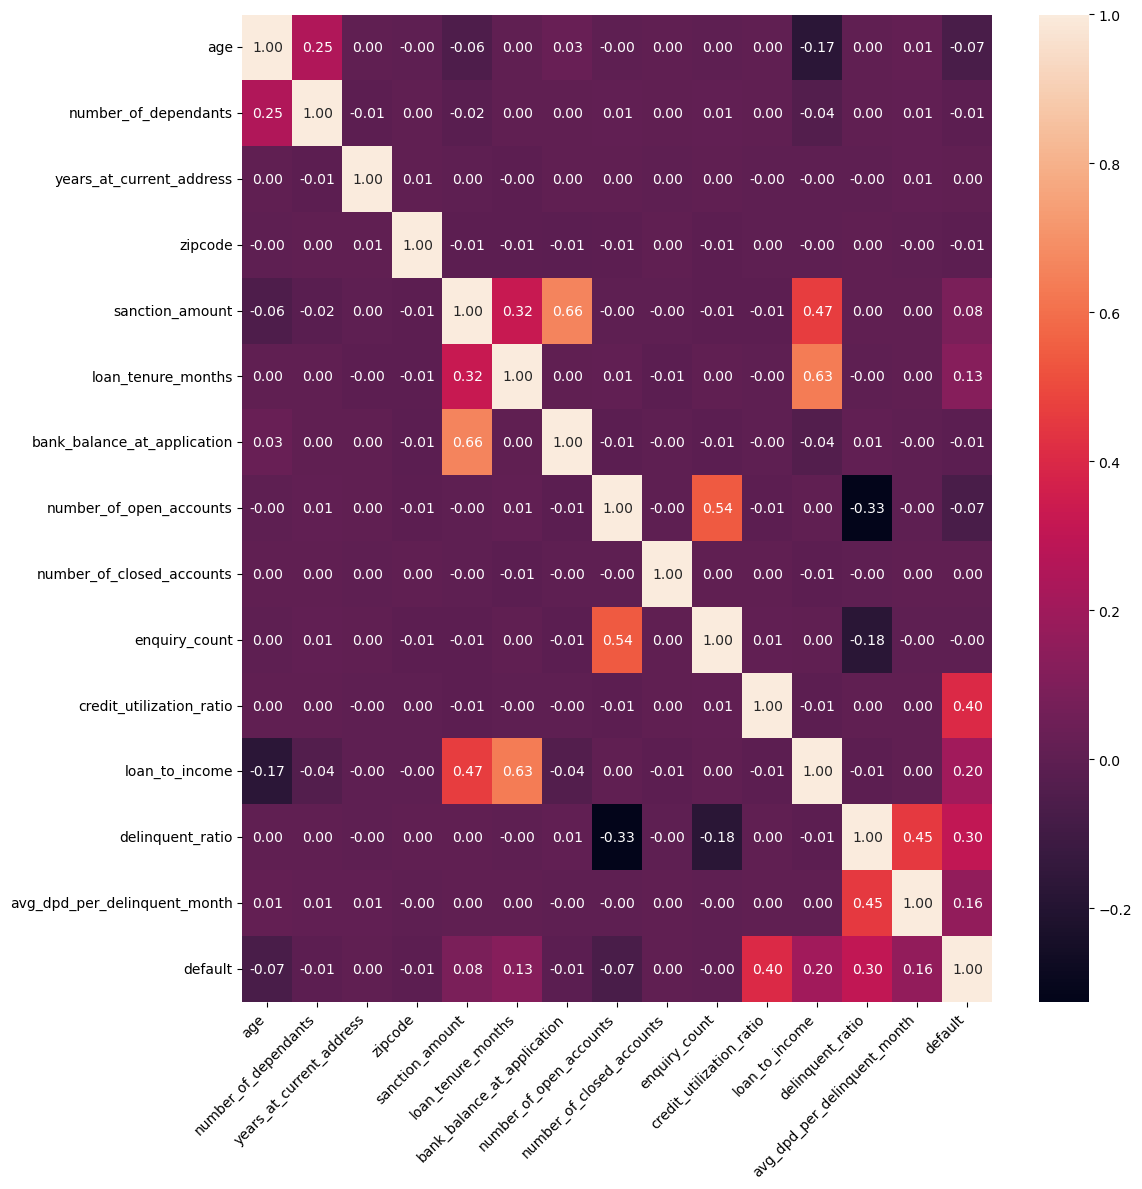

In [59]:
plt.figure(figsize = (12 , 12))
cm = df_train_3[numeric_columns.append(pd.Index(['default']))].corr() 
sns.heatmap(cm , annot = True , fmt = '0.2f')
plt.xticks(rotation=45 , ha = "right")
plt.yticks(rotation = 0)
plt.tight_layout()
plt.show()

In [60]:
categorical_columns = df_train_3.select_dtypes(include=['object', 'category']).columns
categorical_columns

Index(['gender', 'marital_status', 'employment_status', 'residence_type',
       'city', 'state', 'loan_purpose', 'loan_type'],
      dtype='object')

In [61]:
temp = pd.concat([X_train_1 , y_train] , axis = 1)
temp.groupby("loan_purpose")['default'].agg(['count' ,'sum'])

,count,sum
loan_purpose,,
Auto,7437,314
Education,5626,546
Home,11271,1744
Personal,13153,585


In [62]:
def calculate_woe_iv(df , feature , target):
    grouped = df.groupby(feature)[target].agg(['count' , 'sum'])
    grouped = grouped.rename(columns={'count': 'total' , 'sum' : 'good'})
    grouped['bad'] =  grouped['total'] - grouped['good']
    
    total_good = grouped['good'].sum()
    total_bad = grouped['bad'].sum()
    
    grouped['good_pct'] = grouped['good'] / total_good
    grouped['bad_pct'] = grouped['bad']/total_bad
    
    grouped['woe'] = np.log(grouped['good_pct'] / grouped['bad_pct'])
    grouped['iv'] =(grouped['good_pct'] - grouped['bad_pct']) * grouped['woe'] 
    
    grouped['woe'] = grouped['woe'].replace([np.inf , -np.inf] , 0)
    grouped['iv'] = grouped['iv'].replace([np.inf , -np.inf] , 0)

    total_iv = grouped['iv'].sum()
    
    return grouped , total_iv

grouped , total_iv = calculate_woe_iv(pd.concat([X_train_1 , y_train] , axis = 1), 'loan_purpose' , 'default')
grouped

,total,good,bad,good_pct,bad_pct,woe,iv
loan_purpose,,,,,,,
Auto,7437,314,7123,0.098463,0.207680,-0.746312,0.081509
Education,5626,546,5080,0.171214,0.148114,0.144932,0.003348
Home,11271,1744,9527,0.546880,0.277771,0.677431,0.182303
Personal,13153,585,12568,0.183443,0.366435,-0.691918,0.126616


In [63]:
total_iv

0.39377543144164784

In [64]:
pd.cut(X_train_1['loan_to_income'] , bins = 10)

27434       (0.6, 0.7]
13400       (0.1, 0.2]
883      (-0.001, 0.1]
7303        (0.1, 0.2]
45124       (0.3, 0.4]
             ...      
11284       (0.2, 0.3]
44732       (0.2, 0.3]
38158       (0.5, 0.6]
860         (0.2, 0.3]
15795       (0.1, 0.2]
Name: loan_to_income, Length: 37487, dtype: category
Categories (10, interval[float64, right]): [(-0.001, 0.1] < (0.1, 0.2] < (0.2, 0.3] < (0.3, 0.4] ... (0.6, 0.7] < (0.7, 0.8] < (0.8, 0.9] < (0.9, 1.0]]

In [65]:
iv_values = {}

for feature in X_train_1.columns:
    if X_train_1[feature].dtype == 'object' :
        _ , iv = calculate_woe_iv(pd.concat([X_train , y_train] , axis = 1) , feature , 'default')

    else:
        X_binned = pd.cut(X_train_1[feature] , bins = 10 , labels = False)
        _ , iv =calculate_woe_iv(pd.concat([X_binned , y_train ],axis = 1), feature, 'default')
    iv_values[feature] = iv
     

iv_values

{'age': 0.07592687127752061,
 'gender': 0.000482276463421216,
 'marital_status': 0.002196681370832318,
 'employment_status': 0.002447818101774487,
 'number_of_dependants': 0.00364589452118596,
 'residence_type': 0.2594019617563985,
 'years_at_current_address': 0.001042536380353028,
 'city': 0.000817870465334103,
 'state': 0.0007881984519711978,
 'zipcode': 0.0007436024782513755,
 'loan_purpose': 0.39377543144164784,
 'loan_type': 0.17304705897793143,
 'sanction_amount': 0.1067215843237773,
 'loan_tenure_months': 0.23450610202970526,
 'bank_balance_at_application': 0.004242001247914226,
 'number_of_open_accounts': 0.07324250836253295,
 'number_of_closed_accounts': 0.00026280824021760536,
 'enquiry_count': 0.005484982638303533,
 'credit_utilization_ratio': 2.4228228499400095,
 'loan_to_income': 0.49174039815337567,
 'delinquent_ratio': 0.678322540101926,
 'avg_dpd_per_delinquent_month': 0.42123646562822287}

In [66]:
pd.set_option('display.float_format' , lambda x: '{:.3f}'.format(x))

iv_df = pd.DataFrame(list(iv_values.items()),columns=["Feature","IV"])
iv_df = iv_df.sort_values(by = "IV" , ascending = False)
iv_df

,Feature,IV
18,credit_utilization_ratio,2.423
20,delinquent_ratio,0.678
19,loan_to_income,0.492
21,avg_dpd_per_delinquent_month,0.421
10,loan_purpose,0.394
5,residence_type,0.259
13,loan_tenure_months,0.235
11,loan_type,0.173
12,sanction_amount,0.107
0,age,0.076


In [67]:
selected_features_iv = [feature for feature , iv in iv_values.items() if iv > 0.02]
selected_features_iv

['age',
 'residence_type',
 'loan_purpose',
 'loan_type',
 'sanction_amount',
 'loan_tenure_months',
 'number_of_open_accounts',
 'credit_utilization_ratio',
 'loan_to_income',
 'delinquent_ratio',
 'avg_dpd_per_delinquent_month']

### Feature encoding

In [68]:
X_train_reduced = X_train_1[selected_features_iv]
X_test_reduced = X_test_1[selected_features_iv]


In [69]:
X_train_reduced.head()

,age,residence_type,loan_purpose,loan_type,sanction_amount,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquent_ratio,avg_dpd_per_delinquent_month
27434,0.519,Owned,Home,Secured,0.065,0.340,1.000,0.596,0.609,0.067,0.550
13400,0.212,Owned,Auto,Secured,0.058,0.509,0.667,0.929,0.185,0.034,0.425
883,0.615,Mortgage,Personal,Unsecured,0.043,0.245,0.333,0.838,0.086,0.169,0.557
7303,0.481,Owned,Auto,Secured,0.005,0.283,0.000,0.343,0.187,0.000,0.000
45124,0.250,Owned,Education,Secured,0.004,0.736,0.333,0.192,0.363,0.097,0.467


In [70]:
X_train_encoded = pd.get_dummies(X_train_reduced , drop_first = True)
X_test_encoded = pd.get_dummies(X_test_reduced , drop_first = True)

X_train_encoded.head()

,age,sanction_amount,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquent_ratio,avg_dpd_per_delinquent_month,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
27434,0.519,0.065,0.340,1.000,0.596,0.609,0.067,0.550,True,False,False,True,False,False
13400,0.212,0.058,0.509,0.667,0.929,0.185,0.034,0.425,True,False,False,False,False,False
883,0.615,0.043,0.245,0.333,0.838,0.086,0.169,0.557,False,False,False,False,True,True
7303,0.481,0.005,0.283,0.000,0.343,0.187,0.000,0.000,True,False,False,False,False,False
45124,0.250,0.004,0.736,0.333,0.192,0.363,0.097,0.467,True,False,True,False,False,False


In [71]:
print("X_train:", X_train_encoded.shape, "y_train:", y_train.shape)
print("X_test:", X_test_encoded.shape, "y_test:", y_test.shape)

X_train: (37487, 14) y_train: (37487,)
X_test: (12498, 14) y_test: (12498,)


<u><h2 align = 'center'>Model Training</h2></u>

<b>Attempt 1</b>
  <ol>
    <li>Logistic Regression , RandomForest & XGB</li>
    <li>No Handle Class Imbalance</li> 
  </ol>

In [72]:
y_train.value_counts()

default
0    34298
1     3189
Name: count, dtype: int64

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(X_train_encoded , y_train)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test , y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11390
           1       0.84      0.69      0.76      1108

    accuracy                           0.96     12498
   macro avg       0.90      0.84      0.87     12498
weighted avg       0.96      0.96      0.96     12498



In [74]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train_encoded , y_train)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test , y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11390
           1       0.86      0.68      0.76      1108

    accuracy                           0.96     12498
   macro avg       0.91      0.83      0.87     12498
weighted avg       0.96      0.96      0.96     12498



In [75]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train_encoded , y_train)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test , y_pred)
print(report)



              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11390
           1       0.83      0.73      0.78      1108

    accuracy                           0.96     12498
   macro avg       0.90      0.86      0.88     12498
weighted avg       0.96      0.96      0.96     12498



In [76]:
from sklearn.model_selection import RandomizedSearchCV

param_list ={
    'C' : np.logspace(-4 , 4 , 20) , 
    'solver':['lbfgs' , 'saga' , 'liblinear' , 'newton-cg'] # algorithms use in the optimization problem
    
}

# create logistic regression model
log_reg = LogisticRegression(max_iter = 10000)

# set up randomized search cv
random_search = RandomizedSearchCV(
    estimator=log_reg,
    param_distributions = param_list,
    n_iter = 50,
    scoring = 'f1',
    cv = 3,
    verbose = 2 , 
    random_state = 42,
    n_jobs = -1
)

random_search.fit(X_train_encoded , y_train)

print(f"Best parameters : {random_search.best_params_}")
print(f"Best Score : {random_search.best_score_}")

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_encoded)
print("Classification Report :")
print(classification_report(y_test , y_pred))






Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best parameters : {'solver': 'liblinear', 'C': 78.47599703514607}
Best Score : 0.7623723904212462
Classification Report :
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11390
           1       0.83      0.71      0.77      1108

    accuracy                           0.96     12498
   macro avg       0.90      0.85      0.87     12498
weighted avg       0.96      0.96      0.96     12498



In [77]:
from scipy.stats import uniform, randint 

param_list = {
    'n_estimators':[100,150,200,250,300],
    'max_depth':[3,4,5,6,7,8,9,10],
    'learning_rate':[0.01,0.03,0.05,0.1,0.15 , 0.2 , 0.25 , 0.3],
    'subsample':[0.6 , 0.7 , 0.8 , 0.9 , 1.0],
    'colsample_bytree':[0.6,0.7,0.8,0.9,1.0],
    'scale_pos_weight':[1,2,3,5,7,10],
    'reg_alpha':[0.01, 0.1 , 0.5 , 1.0 , 5.0 , 10.0],   # l1 regularization term
    'reg_lambda':[0.01 , 0.1 , 0.5 , 1.0 , 5.0 , 10.0] # l2 regularization term    
}

xgb = XGBClassifier()

random_search = RandomizedSearchCV(
    estimator = xgb , 
    param_distributions=param_list , 
    n_iter = 100,
    scoring = 'f1',
    cv = 3,
    verbose = 1,
    n_jobs = -1 ,
    random_state = 42
)

random_search.fit(X_train_encoded , y_train)


print(f"Best parameters : {random_search.best_params_}")
print(f"Best Score : {random_search.best_score_}")

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_encoded)
print("Classification Report :")
print(classification_report(y_test , y_pred))




Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters : {'subsample': 0.9, 'scale_pos_weight': 3, 'reg_lambda': 1.0, 'reg_alpha': 0.01, 'n_estimators': 250, 'max_depth': 5, 'learning_rate': 0.05, 'colsample_bytree': 0.8}
Best Score : 0.7922483436588211
Classification Report :
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     11390
           1       0.76      0.85      0.80      1108

    accuracy                           0.96     12498
   macro avg       0.87      0.91      0.89     12498
weighted avg       0.97      0.96      0.96     12498



<b>Attempt 2</b>
  <ol>
    <li>Logistic Regression & XGB</li>
    <li>Handle Class Imbalance Using Under Sampling</li> 
  </ol>

In [78]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state = 42)
X_train_rus , y_train_rus = rus.fit_resample(X_train_encoded , y_train)
y_train_rus.value_counts()

default
0    3189
1    3189
Name: count, dtype: int64

In [79]:

model = LogisticRegression()
model.fit(X_train_rus , y_train_rus)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test , y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.99      0.92      0.96     11390
           1       0.53      0.95      0.68      1108

    accuracy                           0.92     12498
   macro avg       0.76      0.94      0.82     12498
weighted avg       0.95      0.92      0.93     12498



In [80]:
model = XGBClassifier(**random_search.best_params_)
model.fit(X_train_rus , y_train_rus)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test , y_pred)
print(report)



              precision    recall  f1-score   support

           0       1.00      0.91      0.95     11390
           1       0.52      0.98      0.68      1108

    accuracy                           0.92     12498
   macro avg       0.76      0.95      0.81     12498
weighted avg       0.96      0.92      0.93     12498



<b>Attempt 3</b>
  <ol>
    <li>Logistic Regression </li>
    <li>Handle Class Imbalance Using SMOTE Tomek</li> 
    <li>Parameter tuning using optuna </li>
  </ol>

In [81]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state = 42)
X_train_smt , y_train_smt = smt.fit_resample(X_train_encoded , y_train)
y_train_smt.value_counts()


default
0    34241
1    34241
Name: count, dtype: int64

In [82]:

model = LogisticRegression()
model.fit(X_train_smt , y_train_smt)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test , y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11390
           1       0.57      0.94      0.71      1108

    accuracy                           0.93     12498
   macro avg       0.78      0.94      0.84     12498
weighted avg       0.96      0.93      0.94     12498



In [83]:
model = XGBClassifier(**random_search.best_params_)
model.fit(X_train_smt , y_train_smt)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test , y_pred)
print(report)


              precision    recall  f1-score   support

           0       1.00      0.93      0.96     11390
           1       0.58      0.96      0.72      1108

    accuracy                           0.93     12498
   macro avg       0.79      0.95      0.84     12498
weighted avg       0.96      0.93      0.94     12498



### Hyperparameter Tuning Using Optuna

In [84]:
import optuna
from sklearn.metrics import make_scorer , f1_score
from sklearn.model_selection import cross_val_score

In [85]:
# Define the objective funtion for optuna

def objective(trial):
    param ={
        'C':trial.suggest_float('C' , 1e-4, 1e4 , log=True ),
        'solver':trial.suggest_categorical('solver' , ['lbfgs','liblinear','saga','newton-cg']),
        'tol':trial.suggest_float('tol',1e-6 , 1e-1 , log=True), # logarithmicall spaced values for tolerance
        'class_weight':trial.suggest_categorical('class_weight' ,[None,'balanced']) # class weights   
    }
    
    model = LogisticRegression(**param , max_iter = 10000)
    
    #calculate the cross validate f1 score 
    f1_scorer = make_scorer(f1_score , average="macro")
    # macro - calculate unweighted mean treates all classes equally regarless of the number of samples
    scores = cross_val_score(model , X_train_smt , y_train_smt , cv = 3 , scoring = f1_scorer , n_jobs= -1)
    
    return np.mean(scores)

study_logistic = optuna.create_study(direction ='maximize')
study_logistic.optimize(objective , n_trials = 50)


[I 2025-03-15 14:47:45,719] A new study created in memory with name: no-name-6f0e805a-d2b0-48be-9ac2-41701edb651e
[I 2025-03-15 14:47:45,931] Trial 0 finished with value: 0.884370409440291 and parameters: {'C': 0.0005878822919874857, 'solver': 'lbfgs', 'tol': 0.014803436212217046, 'class_weight': None}. Best is trial 0 with value: 0.884370409440291.
[I 2025-03-15 14:47:46,419] Trial 1 finished with value: 0.9453145523976566 and parameters: {'C': 1246.2758004791383, 'solver': 'liblinear', 'tol': 3.928750857800876e-06, 'class_weight': None}. Best is trial 1 with value: 0.9453145523976566.
[I 2025-03-15 14:47:46,639] Trial 2 finished with value: 0.9451249142171463 and parameters: {'C': 5329.998674042544, 'solver': 'saga', 'tol': 0.06674351042881153, 'class_weight': 'balanced'}. Best is trial 1 with value: 0.9453145523976566.
[I 2025-03-15 14:47:47,356] Trial 3 finished with value: 0.8328613038428153 and parameters: {'C': 0.0001496424409579033, 'solver': 'saga', 'tol': 3.033137500814023e-0

[I 2025-03-15 14:48:01,698] Trial 34 finished with value: 0.9450331840852492 and parameters: {'C': 7946.644007257719, 'solver': 'liblinear', 'tol': 0.014781770103580148, 'class_weight': None}. Best is trial 30 with value: 0.945474840288483.
[I 2025-03-15 14:48:02,360] Trial 35 finished with value: 0.9453145523976566 and parameters: {'C': 754.9039552244149, 'solver': 'saga', 'tol': 1.4853256829562091e-06, 'class_weight': None}. Best is trial 30 with value: 0.945474840288483.
[I 2025-03-15 14:48:02,714] Trial 36 finished with value: 0.9454894186428445 and parameters: {'C': 2757.9261724738744, 'solver': 'liblinear', 'tol': 0.0051536009746029985, 'class_weight': 'balanced'}. Best is trial 36 with value: 0.9454894186428445.
[I 2025-03-15 14:48:03,069] Trial 37 finished with value: 0.9453000807970925 and parameters: {'C': 3055.081159703485, 'solver': 'saga', 'tol': 0.0018973639169217315, 'class_weight': 'balanced'}. Best is trial 36 with value: 0.9454894186428445.
[I 2025-03-15 14:48:03,382]

In [86]:
print('Best trial:')
trial = study_logistic.best_trial
print(f' F1-score : {format(trial.value)}')
print(' params :')
for key, value in trial.params.items():
    print('   {}: {}'.format(key, value))
    
best_model_logistic = LogisticRegression(**study_logistic.best_params)
best_model_logistic.fit(X_train_smt , y_train_smt)

y_pred = best_model_logistic.predict(X_test_encoded)

report = classification_report(y_test , y_pred)
print(report)


Best trial:
 F1-score : 0.9454894186428445
 params :
   C: 2757.9261724738744
   solver: liblinear
   tol: 0.0051536009746029985
   class_weight: balanced
              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11390
           1       0.58      0.94      0.71      1108

    accuracy                           0.93     12498
   macro avg       0.78      0.94      0.84     12498
weighted avg       0.96      0.93      0.94     12498



<b>Attempt 3</b>
  <ol>
    <li>XGBoost</li>
    <li>Handle Class Imbalance Using SMOTE Tomek</li> 
    <li>Parameter tuning using optuna </li>
  </ol>

In [87]:
# Define the objective function for Optuna
def objective(trial):
    param = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'verbosity': 0,
        'booster': 'gbtree',
        'lambda': trial.suggest_float('lambda', 1e-3, 10.0, log=True),
        'alpha': trial.suggest_float('alpha', 1e-3, 10.0, log=True),
        'subsample': trial.suggest_float('subsample', 0.4, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.4, 1.0),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'eta': trial.suggest_float('eta', 0.01, 0.3),
        'gamma': trial.suggest_float('gamma', 0, 10),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'max_delta_step': trial.suggest_int('max_delta_step', 0, 10)
    }

    model = XGBClassifier(**param)

    # Calculate the cross-validated F1 score
    f1_scorer = make_scorer(f1_score, average='macro')
    scores = cross_val_score(model, X_train_smt, y_train_smt, cv=3, scoring=f1_scorer, n_jobs=-1)

    return np.mean(scores)

# Create Optuna study
study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective, n_trials=50)

[I 2025-03-15 14:48:07,651] A new study created in memory with name: no-name-ef79006b-4a80-49cc-a4f8-bb2e6a05db00
[I 2025-03-15 14:48:09,177] Trial 0 finished with value: 0.9531769445618737 and parameters: {'lambda': 0.054362072075497814, 'alpha': 0.3660944216441776, 'subsample': 0.7199192497073823, 'colsample_bytree': 0.848986484531872, 'max_depth': 4, 'eta': 0.07212720231050788, 'gamma': 4.544508389783473, 'scale_pos_weight': 2.0586612408315323, 'min_child_weight': 1, 'max_delta_step': 0}. Best is trial 0 with value: 0.9531769445618737.
[I 2025-03-15 14:48:10,893] Trial 1 finished with value: 0.9085740150638921 and parameters: {'lambda': 0.009254092752209403, 'alpha': 0.5021523883391383, 'subsample': 0.9401882435060791, 'colsample_bytree': 0.8299177873467527, 'max_depth': 5, 'eta': 0.024605464292101715, 'gamma': 3.914120785781836, 'scale_pos_weight': 9.259847846570896, 'min_child_weight': 5, 'max_delta_step': 7}. Best is trial 0 with value: 0.9531769445618737.
[I 2025-03-15 14:48:12,

[I 2025-03-15 14:48:43,647] Trial 19 finished with value: 0.9740438928402244 and parameters: {'lambda': 0.005683992774201233, 'alpha': 0.004637804851387726, 'subsample': 0.650634368261414, 'colsample_bytree': 0.6296625754108682, 'max_depth': 9, 'eta': 0.26047837632278364, 'gamma': 2.5158896067606014, 'scale_pos_weight': 2.4482748392710816, 'min_child_weight': 6, 'max_delta_step': 6}. Best is trial 19 with value: 0.9740438928402244.
[I 2025-03-15 14:48:45,212] Trial 20 finished with value: 0.9730059569949702 and parameters: {'lambda': 0.007581461404785252, 'alpha': 0.0046069692717716935, 'subsample': 0.4766406980216982, 'colsample_bytree': 0.6433861192124504, 'max_depth': 8, 'eta': 0.2596637960800059, 'gamma': 2.8377920216978967, 'scale_pos_weight': 2.2090556108913266, 'min_child_weight': 6, 'max_delta_step': 5}. Best is trial 19 with value: 0.9740438928402244.
[I 2025-03-15 14:48:47,090] Trial 21 finished with value: 0.9747449021081965 and parameters: {'lambda': 0.0028560742408376034, 

[I 2025-03-15 14:49:18,615] Trial 38 finished with value: 0.9696781118974579 and parameters: {'lambda': 0.002271140626724576, 'alpha': 0.18169485180901743, 'subsample': 0.623479772860619, 'colsample_bytree': 0.8173891166516314, 'max_depth': 7, 'eta': 0.18218711500566695, 'gamma': 3.970846977979182, 'scale_pos_weight': 4.382140240162701, 'min_child_weight': 8, 'max_delta_step': 3}. Best is trial 23 with value: 0.9754317687271823.
[I 2025-03-15 14:49:21,419] Trial 39 finished with value: 0.9743335899955917 and parameters: {'lambda': 0.008834853740854902, 'alpha': 0.07955692549365828, 'subsample': 0.565862551663041, 'colsample_bytree': 0.7868009981892952, 'max_depth': 9, 'eta': 0.14238757460354876, 'gamma': 1.6724459850795719, 'scale_pos_weight': 3.6237213179055323, 'min_child_weight': 1, 'max_delta_step': 7}. Best is trial 23 with value: 0.9754317687271823.
[I 2025-03-15 14:49:23,829] Trial 40 finished with value: 0.9744644259470885 and parameters: {'lambda': 0.009904542253122319, 'alpha

In [88]:
print('Best trial:')
trial = study_xgb.best_trial
print(f' F1-score : {format(trial.value)}')
print(' params :')
for key, value in trial.params.items():
    print('   {}: {}'.format(key, value))

best_params = study_xgb.best_params 
best_model_xgb = XGBClassifier(**best_params)
best_model_xgb.fit(X_train_smt , y_train_smt)

y_pred = best_model_xgb.predict(X_test_encoded)

report = classification_report(y_test , y_pred)
print(report)


Best trial:
 F1-score : 0.9763811433069316
 params :
   lambda: 0.0023382632923365865
   alpha: 0.003526952068236509
   subsample: 0.6657398823676624
   colsample_bytree: 0.880450892838999
   max_depth: 10
   eta: 0.22719158706109083
   gamma: 0.05975738125789167
   scale_pos_weight: 5.284516859229763
   min_child_weight: 3
   max_delta_step: 9
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     11390
           1       0.72      0.85      0.78      1108

    accuracy                           0.96     12498
   macro avg       0.85      0.91      0.88     12498
weighted avg       0.96      0.96      0.96     12498



In [89]:
y_pred = best_model_logistic.predict(X_test_encoded)
report = classification_report(y_test , y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11390
           1       0.58      0.94      0.71      1108

    accuracy                           0.93     12498
   macro avg       0.78      0.94      0.84     12498
weighted avg       0.96      0.93      0.94     12498



In [90]:
from sklearn.metrics import roc_curve

probabilities = best_model_logistic.predict_proba(X_test_encoded)[:,1]
probabilities

fpr , tpr , thresholds = roc_curve(y_test , probabilities)
fpr[:10] , tpr[:10],thresholds[:10]

(array([0.        , 0.        , 0.        , 0.0000878 , 0.0000878 ,
        0.00017559, 0.00017559, 0.00026339, 0.00026339, 0.00035119]),
 array([0.        , 0.00090253, 0.19494585, 0.19494585, 0.27075812,
        0.27075812, 0.29783394, 0.29783394, 0.31227437, 0.31227437]),
 array([       inf, 0.99999995, 0.99899506, 0.99897878, 0.99735975,
        0.99735302, 0.99676244, 0.99663325, 0.99601697, 0.99600342]))

In [91]:
from sklearn.metrics import auc

area = auc(fpr , tpr)
area

0.9831567370199332

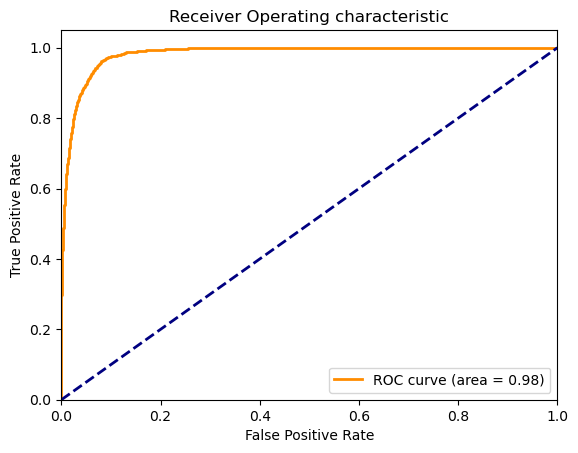

In [92]:
plt.figure()
plt.plot(fpr , tpr , color ='darkorange' , lw=2 , label = 'ROC curve (area = %0.2f)'% area)
plt.plot([0,1],[0,1],color ='navy' , lw = 2 , linestyle ='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating characteristic')
plt.legend(loc="lower right")
plt.show()

### Model Evaluation: Rankorder & KS Statistic

In [93]:
probabilities = best_model_logistic.predict_proba(X_test_encoded)[: ,1]

df_eval = pd.DataFrame({
    'Default Truth':y_test,
    'Default Probability' :probabilities
})
df_eval

,Default Truth,Default Probability
33553,0,0.000
9427,0,0.741
199,0,0.145
12447,0,0.416
39489,0,0.001
...,...,...
9771,0,0.000
34737,0,0.000
30390,0,0.000
6797,0,0.000


In [94]:
df_eval["Decile"] = pd.qcut(df_eval['Default Probability'] , 10 , labels = False , duplicates = 'drop')
df_eval.head(3)

,Default Truth,Default Probability,Decile
33553,0,0.000,1
9427,0,0.741,8
199,0,0.145,7


In [95]:
df_grouped = df_eval.groupby('Decile').apply(lambda x : pd.Series({
    "Minimum Probability": x['Default Probability'].min(),
    "Maximum Probability": x['Default Probability'].max(),
    "Events": x["Default Truth"].sum(),
    "Non-events":x["Default Truth"].count() - x['Default Truth'].sum()

}))
df_grouped.reset_index(inplace = True)
df_grouped

,Decile,Minimum Probability,Maximum Probability,Events,Non-events
0,0,0.000,0.000,0.000,1250.000
1,1,0.000,0.000,0.000,1250.000
2,2,0.000,0.000,0.000,1250.000
3,3,0.000,0.000,0.000,1249.000
4,4,0.000,0.001,0.000,1250.000
5,5,0.001,0.005,1.000,1249.000
6,6,0.005,0.030,2.000,1247.000
7,7,0.030,0.193,17.000,1233.000
8,8,0.194,0.812,171.000,1079.000
9,9,0.813,1.000,917.000,333.000


In [96]:
df_grouped = df_grouped.sort_values("Decile" , ascending=False)
df_grouped

,Decile,Minimum Probability,Maximum Probability,Events,Non-events
9,9,0.813,1.000,917.000,333.000
8,8,0.194,0.812,171.000,1079.000
7,7,0.030,0.193,17.000,1233.000
6,6,0.005,0.030,2.000,1247.000
5,5,0.001,0.005,1.000,1249.000
4,4,0.000,0.001,0.000,1250.000
3,3,0.000,0.000,0.000,1249.000
2,2,0.000,0.000,0.000,1250.000
1,1,0.000,0.000,0.000,1250.000
0,0,0.000,0.000,0.000,1250.000


In [97]:
df_grouped["Event Rate"] = df_grouped["Events"] * 100 / (df_grouped["Events"] + df_grouped["Non-events"])
df_grouped["Non-event Rate"] = df_grouped["Non-events"] * 100 / (df_grouped["Events"] + df_grouped["Non-events"])

df_grouped

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate
9,9,0.813,1.000,917.000,333.000,73.360,26.640
8,8,0.194,0.812,171.000,1079.000,13.680,86.320
7,7,0.030,0.193,17.000,1233.000,1.360,98.640
6,6,0.005,0.030,2.000,1247.000,0.160,99.840
5,5,0.001,0.005,1.000,1249.000,0.080,99.920
4,4,0.000,0.001,0.000,1250.000,0.000,100.000
3,3,0.000,0.000,0.000,1249.000,0.000,100.000
2,2,0.000,0.000,0.000,1250.000,0.000,100.000
1,1,0.000,0.000,0.000,1250.000,0.000,100.000
0,0,0.000,0.000,0.000,1250.000,0.000,100.000


In [98]:
df_grouped["Cum Events"] = df_grouped["Events"].cumsum()
df_grouped["Cum Non-events"] = df_grouped["Non-events"].cumsum()
df_grouped

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate,Cum Events,Cum Non-events
9,9,0.813,1.000,917.000,333.000,73.360,26.640,917.000,333.000
8,8,0.194,0.812,171.000,1079.000,13.680,86.320,1088.000,1412.000
7,7,0.030,0.193,17.000,1233.000,1.360,98.640,1105.000,2645.000
6,6,0.005,0.030,2.000,1247.000,0.160,99.840,1107.000,3892.000
5,5,0.001,0.005,1.000,1249.000,0.080,99.920,1108.000,5141.000
4,4,0.000,0.001,0.000,1250.000,0.000,100.000,1108.000,6391.000
3,3,0.000,0.000,0.000,1249.000,0.000,100.000,1108.000,7640.000
2,2,0.000,0.000,0.000,1250.000,0.000,100.000,1108.000,8890.000
1,1,0.000,0.000,0.000,1250.000,0.000,100.000,1108.000,10140.000
0,0,0.000,0.000,0.000,1250.000,0.000,100.000,1108.000,11390.000


In [99]:
df_grouped["Cum Event Rate"] = df_grouped["Cum Events"] * 100 /df_grouped["Events"].sum()
df_grouped["Cum Non-event Rate"] = df_grouped["Cum Non-events"] * 100 /df_grouped["Non-events"].sum()
df_grouped

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate,Cum Events,Cum Non-events,Cum Event Rate,Cum Non-event Rate
9,9,0.813,1.000,917.000,333.000,73.360,26.640,917.000,333.000,82.762,2.924
8,8,0.194,0.812,171.000,1079.000,13.680,86.320,1088.000,1412.000,98.195,12.397
7,7,0.030,0.193,17.000,1233.000,1.360,98.640,1105.000,2645.000,99.729,23.222
6,6,0.005,0.030,2.000,1247.000,0.160,99.840,1107.000,3892.000,99.910,34.170
5,5,0.001,0.005,1.000,1249.000,0.080,99.920,1108.000,5141.000,100.000,45.136
4,4,0.000,0.001,0.000,1250.000,0.000,100.000,1108.000,6391.000,100.000,56.111
3,3,0.000,0.000,0.000,1249.000,0.000,100.000,1108.000,7640.000,100.000,67.076
2,2,0.000,0.000,0.000,1250.000,0.000,100.000,1108.000,8890.000,100.000,78.051
1,1,0.000,0.000,0.000,1250.000,0.000,100.000,1108.000,10140.000,100.000,89.025
0,0,0.000,0.000,0.000,1250.000,0.000,100.000,1108.000,11390.000,100.000,100.000


In [100]:
df_grouped["KS"] = abs(df_grouped["Cum Event Rate"] - df_grouped["Cum Non-event Rate"])
df_grouped

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate,Cum Events,Cum Non-events,Cum Event Rate,Cum Non-event Rate,KS
9,9,0.813,1.000,917.000,333.000,73.360,26.640,917.000,333.000,82.762,2.924,79.838
8,8,0.194,0.812,171.000,1079.000,13.680,86.320,1088.000,1412.000,98.195,12.397,85.798
7,7,0.030,0.193,17.000,1233.000,1.360,98.640,1105.000,2645.000,99.729,23.222,76.507
6,6,0.005,0.030,2.000,1247.000,0.160,99.840,1107.000,3892.000,99.910,34.170,65.739
5,5,0.001,0.005,1.000,1249.000,0.080,99.920,1108.000,5141.000,100.000,45.136,54.864
4,4,0.000,0.001,0.000,1250.000,0.000,100.000,1108.000,6391.000,100.000,56.111,43.889
3,3,0.000,0.000,0.000,1249.000,0.000,100.000,1108.000,7640.000,100.000,67.076,32.924
2,2,0.000,0.000,0.000,1250.000,0.000,100.000,1108.000,8890.000,100.000,78.051,21.949
1,1,0.000,0.000,0.000,1250.000,0.000,100.000,1108.000,10140.000,100.000,89.025,10.975
0,0,0.000,0.000,0.000,1250.000,0.000,100.000,1108.000,11390.000,100.000,100.000,0.000


<P>KS < 20% → Poor model separation</p>
<P>20% ≤ KS < 40% → Fair model separation</p>
<P>40% ≤ KS < 50% → Good model separation</p>
<P>50% ≤ KS < 60% → Very good model separation</p>
<P>KS ≥ 60% → Excellent model separation</p>

In [101]:
gini_coefficient = 2 * area - 1

print("AUC :",area)
print("Gini Coefficient :", gini_coefficient)

AUC : 0.9831567370199332
Gini Coefficient : 0.9663134740398664


<P>AUC of 0.98: The model is very good at disitinguishing between events and non events</P>

<P>Gini coefficient of 0.96 : This further confirms that the model is highly effective in its predictions , with almost perfect rank ordering capability</P>

<P>The gini coefficient ranges from -1 to 1  , where a value closer to 1 signifies a perfect model  , 0 indicates a model with no discriminative power and -1 signifies a perfectly incorrect model</P> 

### Finalize the model

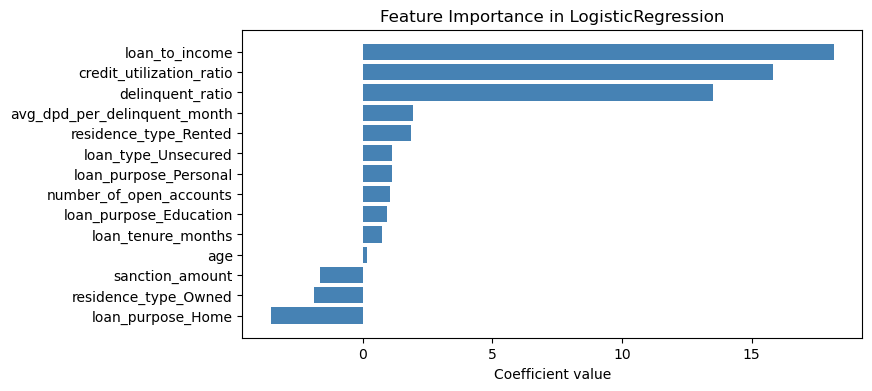

In [102]:
final_model = best_model_logistic

feature_importance = final_model.coef_[0]

coef_df = pd.DataFrame(feature_importance , index = X_train_encoded.columns , columns=['Coefficients'])

coef_df = coef_df.sort_values(by = "Coefficients" , ascending = True)

plt.figure(figsize = (8,4))
plt.barh(coef_df.index , coef_df['Coefficients'] , color ='steelblue')
plt.xlabel("Coefficient value")
plt.title("Feature Importance in LogisticRegression")
plt.show()



### Save the Model

In [103]:
X_test_encoded.head(2)

,age,sanction_amount,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquent_ratio,avg_dpd_per_delinquent_month,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
33553,0.346,0.125,0.528,0.333,0.121,0.256,0.043,0.900,True,False,True,False,False,False
9427,0.288,0.213,0.623,1.000,0.859,0.685,0.000,0.000,True,False,False,True,False,False


In [104]:
cols_to_scale

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'sanction_amount', 'loan_amount', 'processing_fee', 'gst',
       'net_disbursement', 'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquent_ratio',
       'avg_dpd_per_delinquent_month'],
      dtype='object')

In [105]:
X_train_encoded.columns

Index(['age', 'sanction_amount', 'loan_tenure_months',
       'number_of_open_accounts', 'credit_utilization_ratio', 'loan_to_income',
       'delinquent_ratio', 'avg_dpd_per_delinquent_month',
       'residence_type_Owned', 'residence_type_Rented',
       'loan_purpose_Education', 'loan_purpose_Home', 'loan_purpose_Personal',
       'loan_type_Unsecured'],
      dtype='object')

In [107]:
from joblib import dump
model_data ={
    'model': best_model_logistic,
    'features':X_train_encoded.columns,
    'scaler':scaler,
    'cols_to_scale':cols_to_scale   
}
dump(model_data,'artifacts/model_data.joblib')

['artifacts/model_data.joblib']